In [2]:
import joblib
import colorcet as cc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from aging.plotting import format_plots, PlotConfig, save_factory, figure

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm, Normalize, LogNorm

In [3]:
c = PlotConfig()
format_plots()
saver = save_factory(c.save_path / "beh-individualization", tight_layout=False)

In [4]:
data = joblib.load("/n/groups/datta/win/longtogeny/data/ontogeny/version_05/misc/embedding.p")

In [5]:
mice = np.unique(data['mouse'])

In [6]:
cmaps = {k: sns.blend_palette(["k", cc.glasbey_light[k]], as_cmap=True) for k in mice}

cmap_list = [(x / (len(mice) - 1), cc.glasbey_light[y]) for x, y in enumerate(mice)]
segmented = LinearSegmentedColormap.from_list("segmented", cmap_list)

norm = BoundaryNorm(np.arange(len(mice) + 1) / (len(mice) + 1), segmented.N)

cont = plt.get_cmap("bone")
# cont_norm = LogNorm(vmin=data['age'].min() / 7, vmax=data['age'].max() / 7)
cont_norm = Normalize(vmin=data['age'].min() / 7, vmax=data['age'].max() / 7)

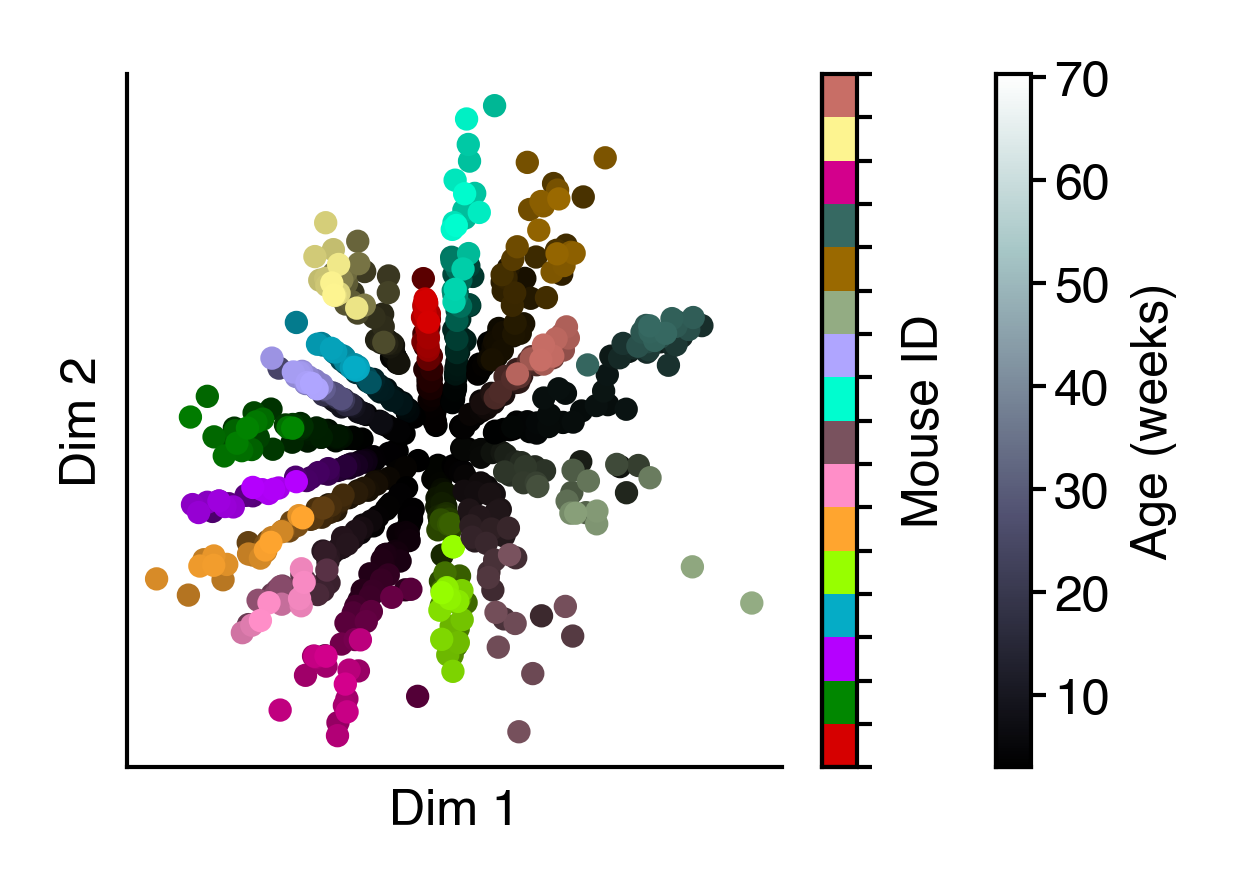

In [7]:
fig = figure(2.2, 1.5)
ax = fig.gca()
for k, v in cmaps.items():
    mask = data["mouse"] == k
    d = data["emb"][mask]
    c = data["age"][mask]
    ax.scatter(*d.T, c=c / 7, cmap=cmaps[k], s=4)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2")
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=cont_norm, cmap=cont), ax=ax, label="Age (weeks)")
cb2.set_ticks([10, 20, 30, 40, 50, 60, 70])
cb1 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=segmented), ax=ax, label="Mouse ID")
cb1.set_ticks([])
sns.despine()
saver(fig, "guided-ae-embedding");